In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

📱 Smartphone Dataset Overview
This dataset contains detailed specifications and attributes of various smartphones, including their ratings, prices, performance, battery capacity, camera specs, and more. The dataset is useful for analyzing smartphone trends, comparing features, and identifying factors that influence pricing and user preferences.

🔍 Key Features:

Brand & Model: Manufacturer and specific model name

Price: Smartphone price in INR

Performance: Processor brand, number of cores, processor speed

Camera: Primary and front camera megapixels, number of cameras

Battery: Capacity (mAh), fast charging support

Storage & RAM: Internal storage, RAM size, expandable storage

Operating System: Android, iOS, or other OS

🚧 Data Cleaning Challenges:

Missing values in several columns

Inconsistent formats in categorical columns

Potential outliers in price, rating, and battery capacity

In [3]:
df = pd.read_csv('/content/smartphone_cleaned_v5.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


Copy the dataset for Data Cleaning , EDA and Data Visulization.

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [6]:
df1.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


In [7]:
df1.duplicated().sum()

np.int64(0)

In [8]:
df1.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

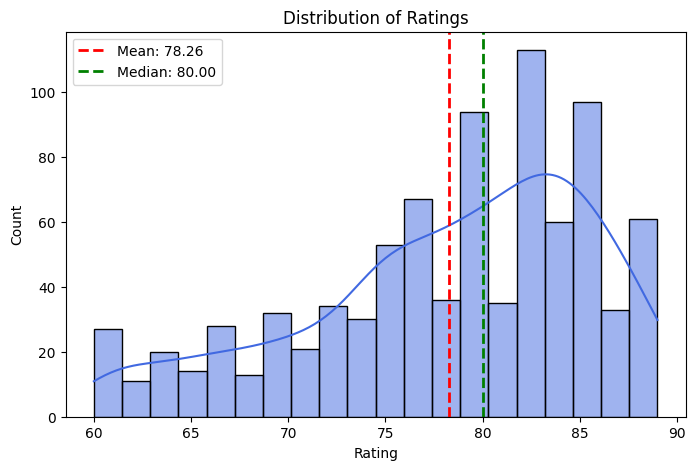

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='royalblue')
plt.axvline(df['rating'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['rating'].mean():.2f}")
plt.axvline(df['rating'].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {df['rating'].median():.2f}")
plt.legend()
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


The rating column has values ranging from 60 to 89, with an average rating of 78.26. The distribution appears fairly normal, so we have a few options to handle missing values:

Mean Imputation (78.26) – If ratings are normally distributed, this is a balanced approach.

Median Imputation (80) – If there are outliers, the median is a safer choice.

Mode Imputation – If a specific rating is most frequent, we can use that.

Drop Rows – If missing values are few, we might remove them.

We'll go with 2nd option.

In [11]:
df1[df1['rating'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,45.0,8.0,256.0,6.80,120,1440 x 3088,4,1.0,android,200.0,12.0,0,NaN
29,oneplus,OnePlus 11 Pro,69999,NaN,True,True,False,snapdragon,8.0,3.20,4500.0,1,100.0,8.0,128.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
37,samsung,Samsung Galaxy S22 Ultra 5G,91999,NaN,True,True,False,snapdragon,8.0,3.00,5000.0,1,45.0,12.0,256.0,6.80,120,1440 x 3080,4,1.0,android,108.0,40.0,0,NaN
49,samsung,Samsung Galaxy A74 5G,42999,NaN,True,True,False,snapdragon,8.0,2.36,5000.0,1,33.0,8.0,128.0,6.70,120,1080 x 2412,4,1.0,android,108.0,32.0,1,1024.0
69,oppo,Oppo Find N Fold,99990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,1792 x 1920,2,NaN,other,50.0,NaN,0,NaN
75,gionee,Gionee G13 Pro,6190,NaN,False,False,False,tiger,4.0,2.00,3500.0,0,NaN,4.0,32.0,6.26,60,720 x 1600,2,1.0,other,13.0,5.0,1,NaN
89,samsung,Samsung Galaxy A73 5G,41999,NaN,True,True,False,snapdragon,8.0,2.40,5000.0,1,25.0,8.0,128.0,6.70,120,1080 x 2400,4,1.0,android,108.0,32.0,1,1024.0
93,vivo,Vivo X90 Pro Plus 5G,73999,NaN,True,True,True,snapdragon,8.0,3.20,4700.0,1,80.0,12.0,256.0,6.78,120,1440 x 3200,4,1.0,android,50.3,32.0,0,NaN
98,vivo,Vivo X Fold 5G,106990,NaN,True,True,False,snapdragon,8.0,3.00,4600.0,1,66.0,12.0,256.0,8.03,120,1916 x 2160,4,1.0,android,50.0,16.0,0,NaN
105,xiaomi,Xiaomi 13 Pro 5G,58990,NaN,True,True,True,snapdragon,8.0,3.20,4820.0,1,120.0,8.0,128.0,6.73,120,1440 x 3200,3,1.0,android,50.3,32.0,0,NaN


In [12]:
df1['rating'] = df1['rating'].fillna(df1['rating'].median())


Since processor brands are categorical, we have a few options to handle missing values:

Mode Imputation (Most Frequent Value) – If one brand is dominant, we can fill missing values with it.

Random Imputation – Assign missing values randomly based on existing distribution.

Forward/Backward Fill – If the data is sorted meaningfully (e.g., by release date), we can propagate nearby values.

Using Other Features – If we have a "processor_model" column, we can infer the brand from it.

We'll simply replace all these values with unknown

In [13]:
df1['processor_brand'].describe()

,processor_brand
count,960
unique,13
top,snapdragon
freq,413


In [14]:
nan_processor_phones = df1[df1['processor_brand'].isna()]

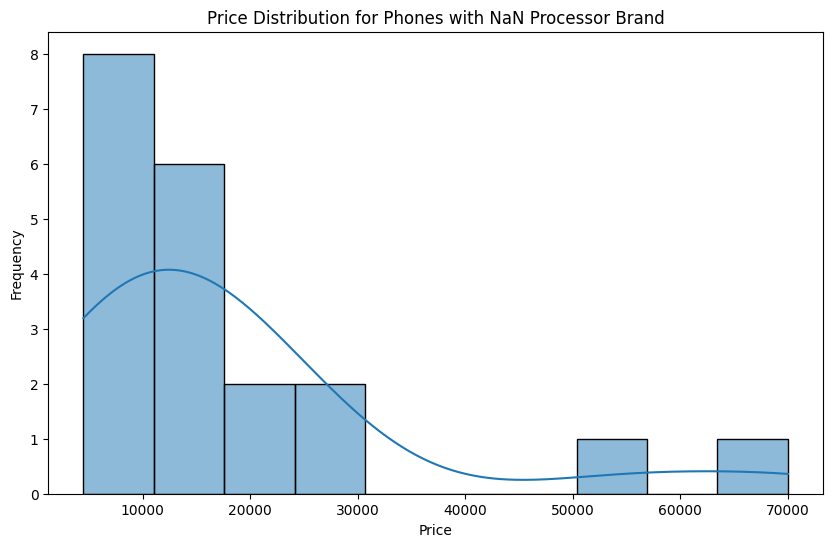

In [15]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(nan_processor_phones['price'], bins=10, kde=True)  # Adjust bins as needed
plt.title('Price Distribution for Phones with NaN Processor Brand')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
df1['processor_brand'].value_counts()

,count
processor_brand,
snapdragon,413
helio,201
dimensity,177
exynos,50
bionic,45
unisoc,26
tiger,24
google,9
kirin,7


In [17]:
# Fill missing values in processor_brand with 'Unknown'
df1["processor_brand"] = df1["processor_brand"].fillna("Unknown")


Since all missing values in the num_cores column belong to Apple, we can fill them based on Apple's typical core configurations. Most Apple smartphones use Hexa-core (6 cores) processors.

In [18]:
df1.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,0
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,0
num_cores,6
processor_speed,42


In [19]:
df1[df1["brand_name"] == "apple"]["num_cores"].isna().sum()


np.int64(5)

In [20]:
df1["num_cores"].dtype


dtype('float64')

In [21]:
df1.loc[(df1["brand_name"] == "apple") & (df1["num_cores"].isna()), "num_cores"] = 6
print(df1[df1["brand_name"] == "apple"]["num_cores"].isna().sum())  # Should print 0


0


In [22]:
df1[df1["num_cores"].isna()]


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
425,nokia,Nokia X50 5G,34999,76.0,True,False,False,snapdragon,NaN,NaN,6000.0,1,33.0,6.0,64.0,6.81,60,1080 x 2400,4,1.0,android,108.0,32.0,1,NaN


In [23]:
df1.loc[df1["model"] == "Nokia X50 5G", "num_cores"] = 8


Since the missing values belong to different brands with different processor_brand and num_cores, filling them with a single value like the mean or mode may not be the best choice.

Possible Approaches:
Fill based on the brand & processor type:

If we find the average processor speed for each processor_brand, we can fill missing values accordingly.

Fill with a general median value:

If the missing values are scattered across various brands, filling them with the median of the entire dataset is an alternative.

Fill with "Unknown" or drop the rows:

If processor speed is a crucial feature for analysis, dropping the rows might be an option (not preferred unless missing values are very few).

We'll go with first one.

In [24]:
df1.loc[27]

,27
brand_name,apple
model,Apple iPhone 14 Pro Max
price,129990
rating,76.0
has_5g,True
has_nfc,True
has_ir_blaster,False
processor_brand,bionic
num_cores,6.0
processor_speed,NaN


In [25]:
# Calculate the median processor speed for each processor brand
median_speed_per_brand = df1.groupby('processor_brand')['processor_speed'].median()

# Fill missing values in 'processor_speed' based on 'processor_brand'
df1['processor_speed'] = df1.apply(
    lambda row: median_speed_per_brand[row['processor_brand']] if pd.isnull(row['processor_speed']) else row['processor_speed'],
    axis=1
)


🛠 Handling Missing Values in battery_capacity
Since all missing values belong to Apple devices, we will:

Find the median battery capacity of all Apple phones in the dataset.

Fill missing values with this median to maintain consistency.

In [26]:
df1.loc[305]

,305
brand_name,apple
model,Apple iPhone 12 (128GB)
price,55999
rating,75.0
has_5g,True
has_nfc,True
has_ir_blaster,False
processor_brand,bionic
num_cores,6.0
processor_speed,3.1


In [27]:
# Calculate median battery capacity for Apple devices
apple_median_battery = df1[df1['brand_name'] == 'apple']['battery_capacity'].median()

# Fill missing values with the Apple median battery capacity
df1.loc[(df1['brand_name'] == 'apple') & (df1['battery_capacity'].isnull()), 'battery_capacity'] = apple_median_battery


In [28]:
df1[df1['fast_charging'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,3279.0,1,NaN,6.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,3240.0,1,NaN,4.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN
25,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,True,True,False,snapdragon,8.0,2.84,4500.0,1,NaN,8.0,128.0,6.50,120,1080 x 2400,3,1.0,android,12.0,32.0,1,NaN
27,apple,Apple iPhone 14 Pro Max,129990,76.0,True,True,False,bionic,6.0,3.22,4323.0,1,NaN,6.0,128.0,6.70,120,1290 x 2796,3,1.0,ios,48.0,12.0,0,NaN
33,apple,Apple iPhone 11,38999,73.0,False,True,False,bionic,6.0,2.65,3110.0,0,NaN,4.0,64.0,6.10,60,828 x 1792,2,1.0,ios,12.0,12.0,0,NaN
47,realme,Realme C33,8950,64.0,False,False,False,unisoc,8.0,1.80,5000.0,0,NaN,3.0,32.0,6.50,60,720 x 1600,2,1.0,android,50.0,5.0,1,1024.0
56,apple,Apple iPhone 14 Plus,74999,82.0,True,True,False,bionic,6.0,3.22,4325.0,1,NaN,6.0,128.0,6.70,60,1284 x 2778,2,1.0,ios,12.0,12.0,0,NaN
70,oppo,OPPO A17K,9499,62.0,False,False,False,helio,8.0,2.30,5000.0,0,NaN,3.0,64.0,6.56,60,720 x 1612,1,1.0,android,8.0,5.0,1,1024.0
75,gionee,Gionee G13 Pro,6190,80.0,False,False,False,tiger,4.0,2.00,3500.0,0,NaN,4.0,32.0,6.26,60,720 x 1600,2,1.0,other,13.0,5.0,1,NaN


In [29]:
df['fast_charging'].value_counts().head()

,count
fast_charging,
33.0,152
18.0,128
67.0,65
25.0,53
120.0,46


float64
[100.  33.  15.  nan  67.  25. 120.  80.  18.  45.  10.  66.  44. 210.
  30. 150.  68.  50.  20.  65. 180. 125.  40.  60. 200. 240.  19.  21.
 135. 165.  22.  27.  55.]


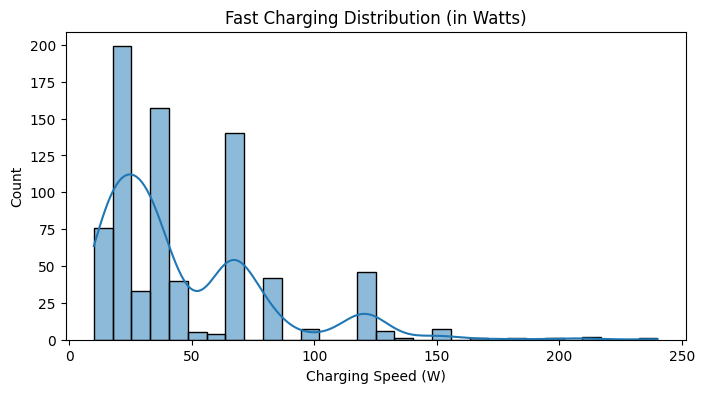

In [30]:
# Check data type
print(df1['fast_charging'].dtype)

# Check unique values (to confirm if it's numerical)
print(df1['fast_charging'].unique())

# Plot distribution of fast charging values
plt.figure(figsize=(8,4))
sns.histplot(df1['fast_charging'], bins=30, kde=True)
plt.title('Fast Charging Distribution (in Watts)')
plt.xlabel('Charging Speed (W)')
plt.show()


In [31]:
missing_fast_charging = df1[df1['fast_charging'].isnull()]
print(missing_fast_charging['brand_name'].value_counts())


brand_name
apple       43
samsung     23
vivo        21
oppo        17
realme      17
xiaomi      13
tecno       11
itel         8
motorola     5
infinix      5
google       4
poco         4
jio          3
oneplus      3
lava         3
micromax     3
gionee       3
ikall        3
nokia        2
royole       2
letv         2
lyf          2
lg           2
huawei       2
duoqin       1
blu          1
redmi        1
sony         1
vertu        1
honor        1
leitz        1
cat          1
sharp        1
oukitel      1
Name: count, dtype: int64


In [32]:
# Step 1: Identify the median fast charging wattage
median_fast_charging = df1['fast_charging'].median()

# Step 2: Fill missing values based on brand trends
charging_by_brand = df1.groupby('brand_name')['fast_charging'].median()

for brand in df1['brand_name'].unique():
    df1.loc[(df1['brand_name'] == brand) & (df1['fast_charging'].isnull()), 'fast_charging'] = charging_by_brand[brand]

# Step 3: Fill remaining missing values with median
df1['fast_charging'] = df1['fast_charging'].fillna(median_fast_charging)


In [33]:
df1[df1['num_front_cameras'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
69,oppo,Oppo Find N Fold,99990,80.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,1792 x 1920,2,NaN,other,50.0,NaN,0,NaN
458,xiaomi,Xiaomi Mi Mix Alpha,199990,80.0,True,False,False,snapdragon,8.0,2.96,4050.0,1,40.0,12.0,512.0,7.92,60,2088 x 2250,3,NaN,android,108.0,NaN,0,NaN
954,huawei,Huawei Mate X,169000,80.0,True,True,True,kirin,8.0,2.86,4500.0,1,55.0,8.0,512.0,8.00,60,2200 x 2480,4,NaN,NaN,48.0,NaN,0,NaN
972,itel,itel A23s,4787,80.0,False,False,False,spreadtrum,4.0,1.40,3020.0,0,18.0,2.0,32.0,5.00,60,854 x 480,1,NaN,android,2.0,NaN,0,NaN


In [34]:
# Manually fill missing values
df1.loc[df1['model'] == 'Oppo Find N Fold', 'num_front_cameras'] = 1  # Example
df1.loc[df1['model'] == 'Xiaomi Mi Mix Alpha', 'num_front_cameras'] = 0  # Example
df1.loc[df1['model'] == 'Huawei Mate X', 'num_front_cameras'] = 0  # Example
df1.loc[df1['model'] == 'itel A23s', 'num_front_cameras'] = 1  # Example


In [35]:
df1[df1['os'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
158,oppo,Oppo Find N2 5G,94990,80.0,True,True,False,snapdragon,8.0,3.20,4520.0,1,67.0,12.0,256.0,7.10,120,1792 x 1920,3,2.0,NaN,50.0,32.0,0,NaN
304,samsung,Samsung Galaxy Z Flip 3,69999,84.0,True,True,False,snapdragon,8.0,2.84,3300.0,1,15.0,8.0,128.0,6.70,120,1080 x 2640,2,1.0,NaN,12.0,10.0,0,NaN
320,royole,Royole FlexPai 2,109999,87.0,True,False,False,snapdragon,8.0,2.84,4450.0,0,33.0,8.0,128.0,7.80,60,1440 x 1920,3,1.0,NaN,64.0,32.0,0,NaN
363,oppo,OPPO Find N Flip,89990,88.0,True,True,False,dimensity,8.0,3.05,4300.0,1,44.0,8.0,128.0,6.80,120,1200 x 2400,2,1.0,NaN,50.0,32.0,0,NaN
389,oppo,OPPO Find N2 Flip,70990,88.0,True,True,False,dimensity,8.0,3.20,4300.0,1,44.0,8.0,256.0,6.80,120,1080 x 2520,2,1.0,NaN,50.0,32.0,0,NaN
498,samsung,Samsung Galaxy Z Flip 4 5G,89999,88.0,True,True,False,snapdragon,8.0,3.20,3700.0,1,25.0,8.0,128.0,6.70,120,1080 x 2640,2,1.0,NaN,12.0,10.0,0,NaN
561,lg,LG Wing 5G,54999,89.0,True,True,False,snapdragon,8.0,2.40,4000.0,1,25.0,8.0,128.0,6.80,60,1080 x 2460,3,1.0,NaN,64.0,32.0,0,NaN
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,helio,8.0,2.20,9800.0,1,66.0,12.0,256.0,6.78,120,1080 x 2400,3,1.0,NaN,64.0,NaN,0,NaN
662,lg,LG V60 ThinQ,79990,80.0,True,True,False,snapdragon,8.0,2.84,5000.0,1,25.0,8.0,128.0,6.80,60,1080 x 2460,3,1.0,NaN,64.0,10.0,0,NaN
699,asus,Asus ROG Phone 6D Ultimate,107990,80.0,True,True,False,dimensity,8.0,3.20,6000.0,1,65.0,16.0,512.0,6.78,165,1080 x 2448,3,1.0,NaN,50.0,12.0,0,NaN


In [36]:
df1.loc[(df1['brand_name'] == 'huawei') & (df1['os'].isnull()), 'os'] = 'harmonyos'
df1.loc[(df1['brand_name'].isin(['samsung', 'royole', 'lg', 'cat', 'vivo', 'oppo', 'asus', ])) & (df1['os'].isnull()), 'os'] = 'android'
df1.loc[(df1['brand_name'] == 'oukitel') & (df1['os'].isnull()), 'os'] = 'android'


In [37]:
print(df1.columns)


Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')


In [38]:
df1.columns = df1.columns.str.strip()  # Remove any leading/trailing spaces


In [39]:
print(df1[['model']].head())  # Check if 'model' column exists and is correctly named


                       model
0              OnePlus 11 5G
1  OnePlus Nord CE 2 Lite 5G
2      Samsung Galaxy A14 5G
3       Motorola Moto G62 5G
4         Realme 10 Pro Plus


In [40]:
print(df1[df1['model'].isin(['Oppo Find N Fold', 'Xiaomi Mi Mix Alpha', 'Huawei Mate X', 'Oukitel WP21', 'itel A23s'])])


    brand_name                model   price  rating  has_5g  has_nfc  \
69        oppo     Oppo Find N Fold   99990    80.0    True     True   
458     xiaomi  Xiaomi Mi Mix Alpha  199990    80.0    True    False   
599    oukitel         Oukitel WP21   22990    82.0   False    False   
954     huawei        Huawei Mate X  169000    80.0    True     True   
972       itel            itel A23s    4787    80.0   False    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
69            False      snapdragon        8.0             3.20   
458           False      snapdragon        8.0             2.96   
599           False           helio        8.0             2.20   
954            True           kirin        8.0             2.86   
972           False      spreadtrum        4.0             1.40   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
69             5000.0                        1           67.0           8.0   
458   

In [41]:
df1.loc[df1['model'] == 'Oppo Find N Fold', 'primary_camera_front'] = 32
df1.loc[df1['model'] == 'Xiaomi Mi Mix Alpha', 'primary_camera_front'] = 0
df1.loc[df1['model'] == 'Huawei Mate X', 'primary_camera_front'] = 0
df1.loc[df1['model'] == 'Oukitel WP21', 'primary_camera_front'] = 20
df1.loc[df1['model'] == 'itel A23s', 'primary_camera_front'] = 0


In [42]:
print(df1[df1['primary_camera_front'].isnull()])


Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []


In [43]:
df1.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,0
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,0
num_cores,0
processor_speed,0


If the phone is Apple, it will be filled with "No expandable storage".

If the phone is any other brand, the missing values will be filled with the most frequent "extended_upto" value for that brand.

If no frequent value exists for a brand (i.e., if all values are missing), it will be filled with "Unknown".



In [44]:
df1[df1['extended_upto'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,3279.0,1,18.0,6.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,4980.0,1,120.0,8.0,256.0,6.67,120,1080 x 2400,3,1.0,android,200.0,16.0,0,NaN
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,4500.0,1,33.0,8.0,128.0,6.55,120,1080 x 2400,2,1.0,android,50.0,16.0,0,NaN
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,4500.0,1,80.0,8.0,128.0,6.43,90,1080 x 2400,3,1.0,android,50.0,32.0,0,NaN
11,oppo,Oppo A78,18999,79.0,True,True,False,dimensity,8.0,2.20,5000.0,1,33.0,8.0,128.0,6.56,90,720 x 1612,2,1.0,android,50.0,8.0,1,NaN
12,xiaomi,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,True,False,True,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.67,120,1080 x 2400,3,1.0,android,50.0,16.0,0,NaN
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,80.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,45.0,8.0,256.0,6.80,120,1440 x 3088,4,1.0,android,200.0,12.0,0,NaN
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,3240.0,1,18.0,4.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,NaN


In [45]:
# Step 1: Fill missing values for Apple with "No expandable storage"
df1.loc[(df1['brand_name'] == 'Apple') & (df1['extended_upto'].isnull()), 'extended_upto'] = 'No expandable storage'

# Step 2: Fill remaining missing values using the most common value for that brand
df1['extended_upto'] = df1.groupby('brand_name')['extended_upto'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


<ipython-input-45-9cef9987eaf5>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No expandable storage' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[(df1['brand_name'] == 'Apple') & (df1['extended_upto'].isnull()), 'extended_upto'] = 'No expandable storage'
<ipython-input-45-9cef9987eaf5>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['extended_upto'] = df1.groupby('brand_name')['extended_upto'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


Data Visulization and EDA

Numerical Columns : price, rating, num_cores, processor_speed, battery_capacity, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, num_real_camera, num_front_camera, primary_real_camera, primary_front_camera, extended_upto

Categorical Column: has_5g, has_nfc, has_ir_blaster, fast_charging_available, extended_memory_available

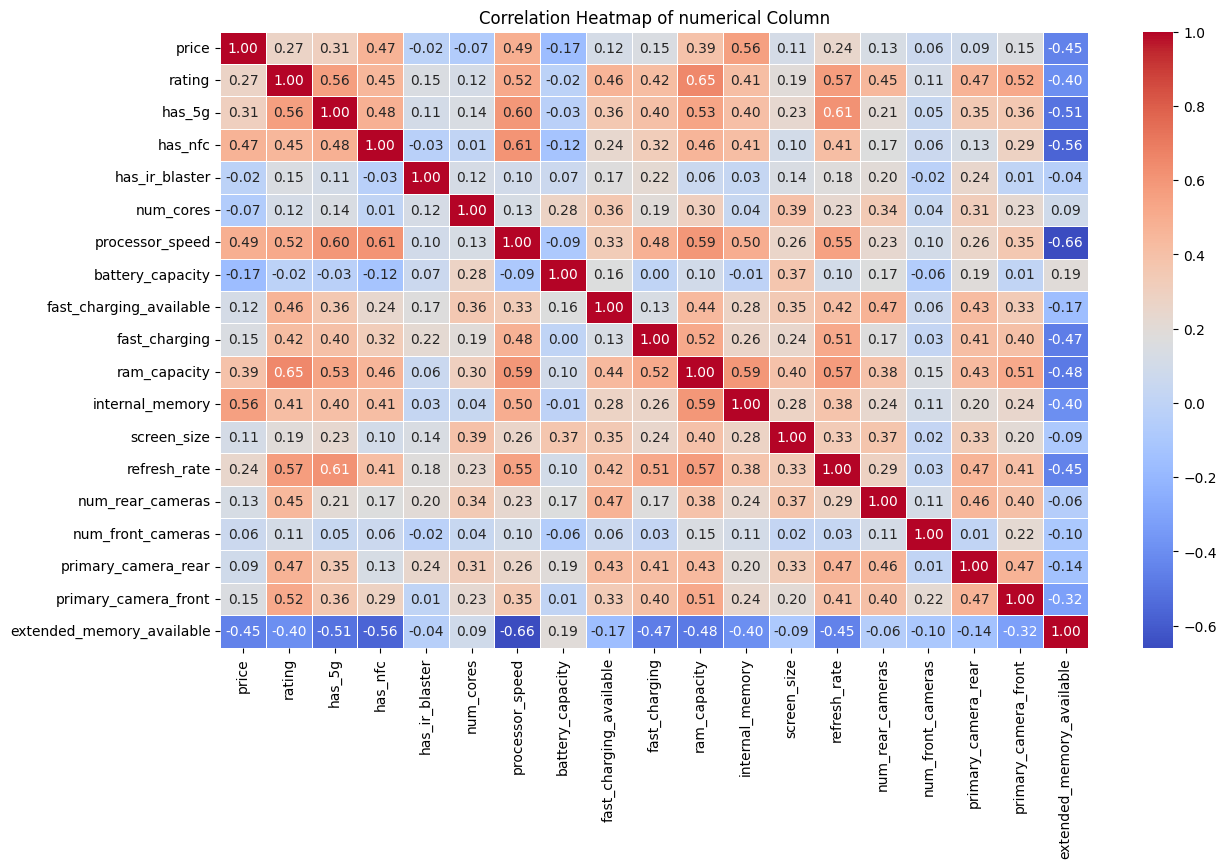

In [46]:
plt.figure(figsize=(14,8))
corr_matrix = df1.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt = '.2f', linewidths= 0.5)
plt.title("Correlation Heatmap of numerical Column")
plt.show()

Insights from the Price Distribution:
The price distribution is right-skewed, meaning most smartphones are priced at the lower end.

A majority of smartphones are priced below ₹50,000, with very few models in the ultra-premium range.

The presence of a long tail suggests luxury flagship models exist but are relatively rare.

Text(0, 0.5, 'Count')

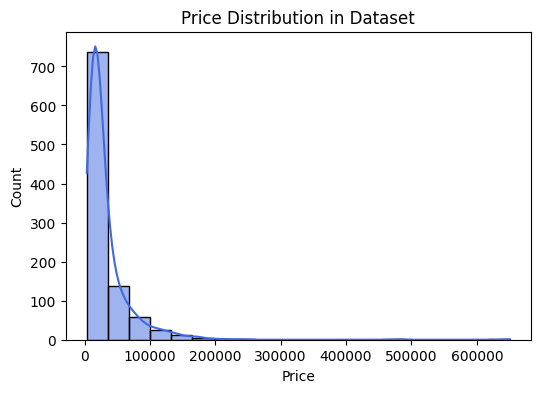

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(df1['price'],bins = 20,  color = 'royalblue', kde = True)
plt.title("Price Distribution in Dataset")
plt.xlabel('Price')
plt.ylabel('Count')

In [48]:
df1['price'].skew()

np.float64(6.591790999665567)

Text(0.5, 1.0, 'Boxplot for price Column')

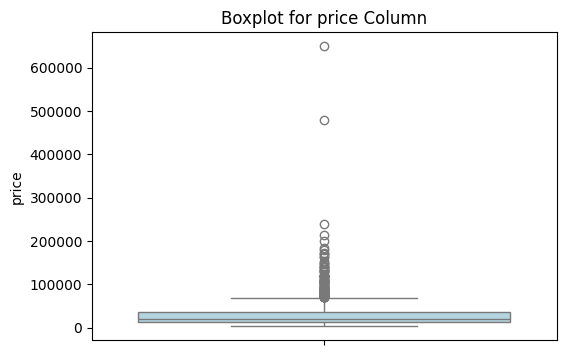

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['price'], color='lightblue')
plt.title("Boxplot for price Column")



📌 Most smartphones have a battery capacity between 3000mAh and 5000mAh, with a few exceeding 6000mAh.

📌 Some outliers suggest ultra-high battery capacity phones exist, but they are rare.

📌 The histogram shows a right-skewed distribution, meaning a few phones have exceptionally high battery capacities.

Text(0.5, 0, 'Battery Capacity')

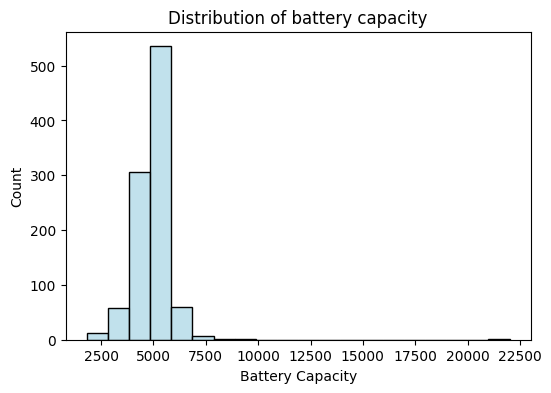

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df1['battery_capacity'], color='lightblue', bins = 20)
plt.title('Distribution of battery capacity')
plt.xlabel('Battery Capacity')

Text(0.5, 1.0, 'Boxplot for price Column')

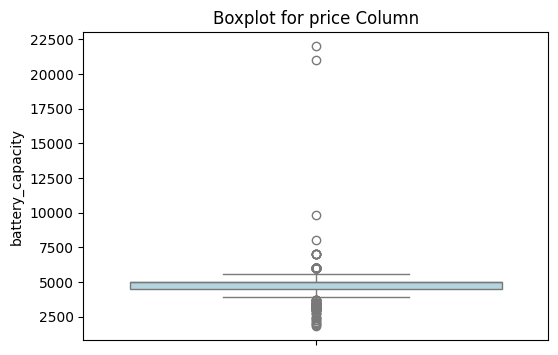

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['battery_capacity'], color='lightblue')
plt.title("Boxplot for price Column")



Text(0.5, 0, 'Processor speed')

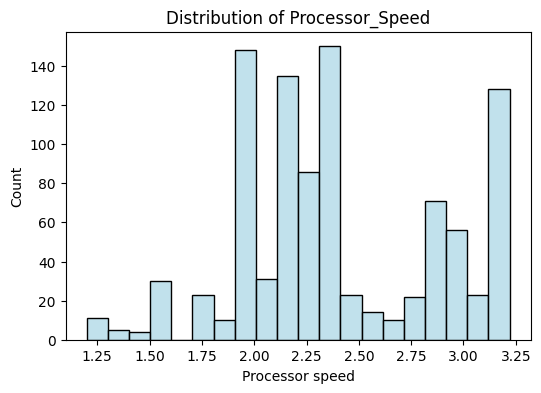

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(df1['processor_speed'], color='lightblue', bins = 20)
plt.title('Distribution of Processor_Speed')
plt.xlabel('Processor speed')

Fast charging technology is evolving rapidly, with most smartphones supporting at least 30W+ charging. However, ultra-fast charging (above 100W) is still not widespread and remains a premium feature. Budget phones tend to stay within 15W to 25W.

Text(0.5, 0, 'Fast Charging')

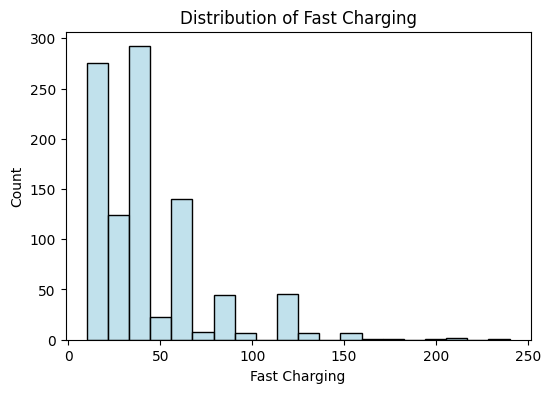

In [53]:
plt.figure(figsize=(6,4))
sns.histplot(df1['fast_charging'], color='lightblue', bins = 20)
plt.title('Distribution of Fast Charging')
plt.xlabel('Fast Charging')

Text(0.5, 1.0, 'Boxplot for fast_charging Column')

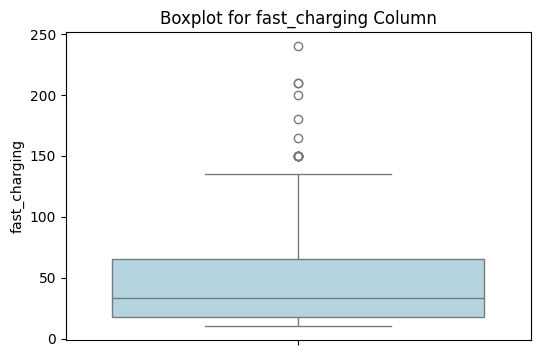

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(df1['fast_charging'], color='lightblue')
plt.title("Boxplot for fast_charging Column")



<ipython-input-55-a31d99f186f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df1, y='brand_name', order=df1['brand_name'].value_counts().head(10).index, palette='viridis')


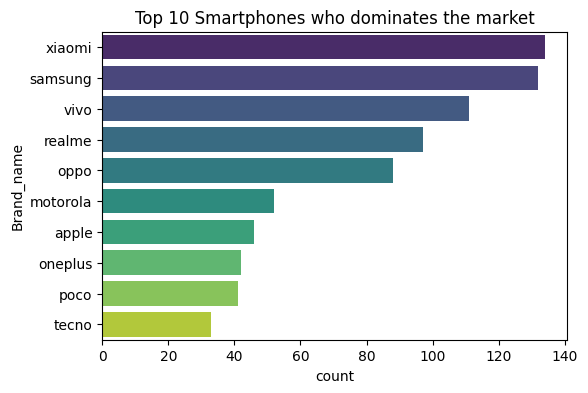

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data = df1, y='brand_name', order=df1['brand_name'].value_counts().head(10).index, palette='viridis')
plt.title("Top 10 Smartphones who dominates the market")
plt.ylabel('Brand_name')
plt.show()

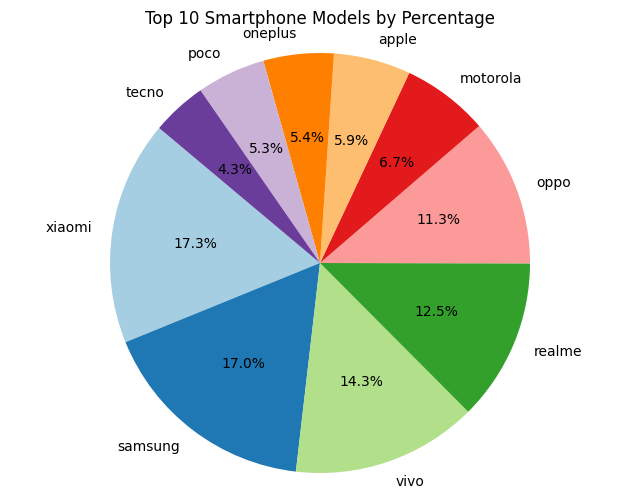

In [56]:
# Get top 10 smartphone models by count
top_10_brands= df1['brand_name'].value_counts().head(10)

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Smartphone Models by Percentage')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


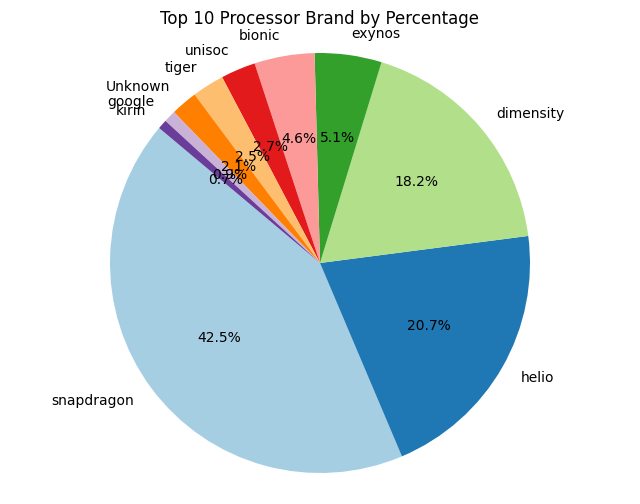

In [57]:
# Get top 10 smartphone models by count
top_10_brands= df1['processor_brand'].value_counts().head(10)

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Processor Brand by Percentage')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


Android Dominates: As expected, Android is the most widely used operating system in the dataset, covering a significant majority of smartphones.

iOS Holds a Niche: Apple’s iOS is the second most common but far behind Android in terms of sheer numbers.

Other OS Are Rare: Other operating systems like HarmonyOS (Huawei’s OS), KaiOS, and others have minimal representation, indicating that the market is heavily consolidated between Android and iOS.

Text(0.5, 0, 'Os Name')

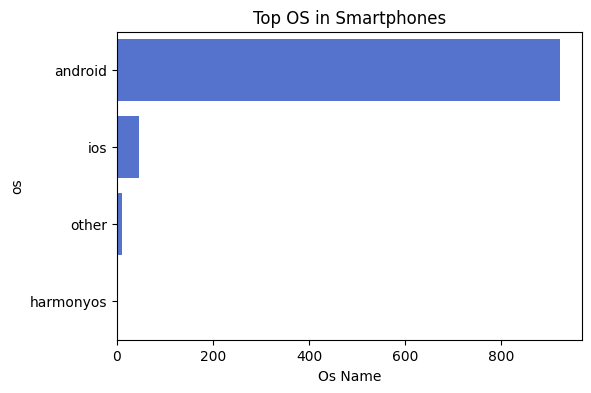

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(data=df1['os'], color='royalblue')
plt.title("Top OS in Smartphones")
plt.xlabel("Os Name")

<Axes: ylabel='count'>

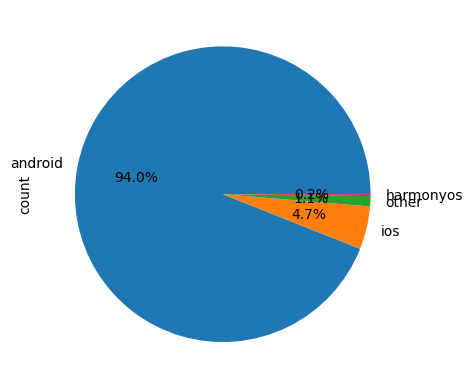

In [59]:
df1['os'].value_counts().plot(kind = 'pie', autopct="%0.1f%%")

Bivariate Analysis

Brands with dots all over the place = they sell phones from budget to luxury (Samsung, Xiaomi, etc.).

Brands with dots packed at the bottom = mainly affordable (like some Chinese brands).

One or two dots floating high up? That’s probably an overpriced flagship flexing on the peasants! 😂

<ipython-input-65-b3d73a853cb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df1["brand_name"], y=df1["price"], jitter=True, palette="viridis", alpha=0.7)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


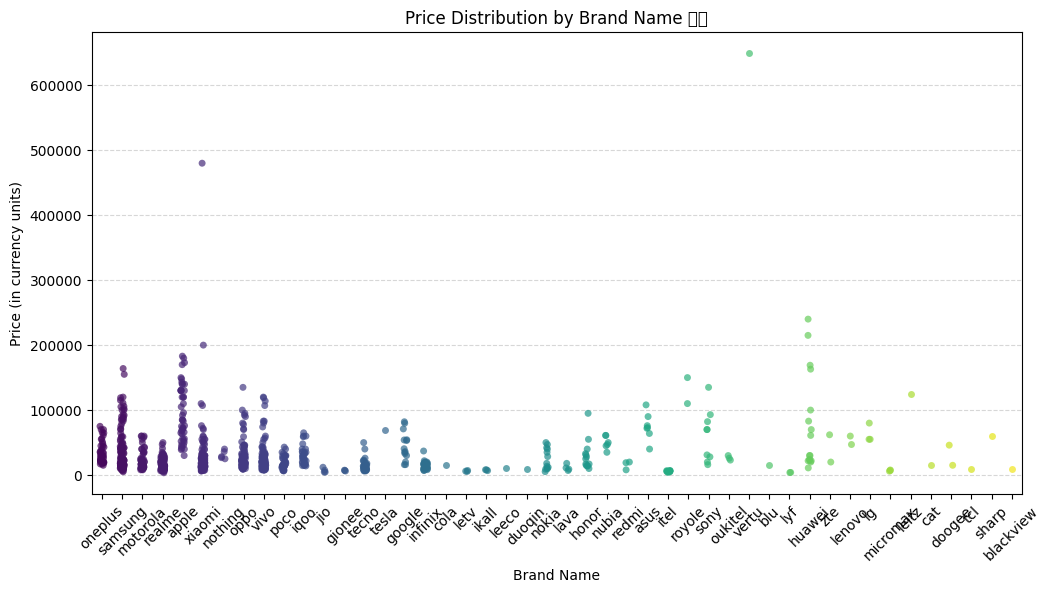

In [65]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=df1["brand_name"], y=df1["price"], jitter=True, palette="viridis", alpha=0.7)
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand Name 📱💸")
plt.ylabel("Price (in currency units)")
plt.xlabel("Brand Name")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


If you're budget-conscious, don’t fear—some low-cost warriors might surprise you!

If you're going premium, research carefully—some high-end flops exist!

At the end of the day, user experience > price tag! 🏆📱

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


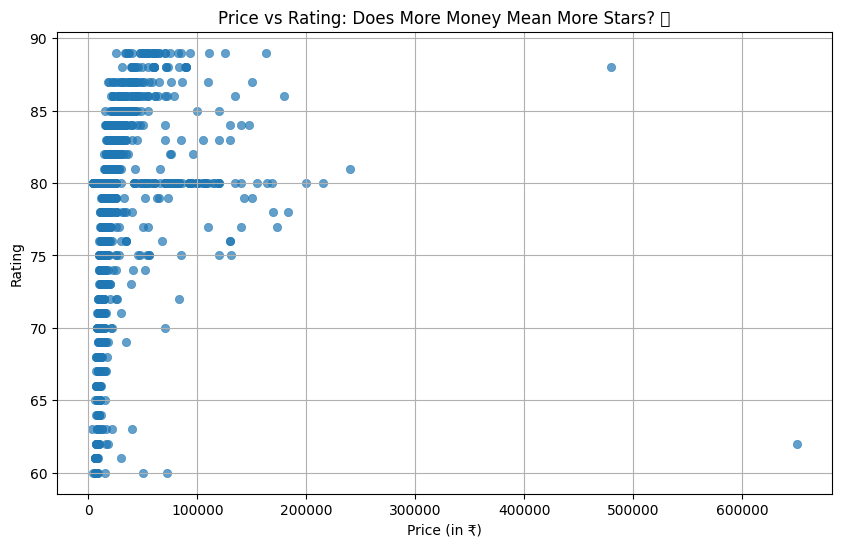

In [67]:
# Scatter plot for Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['price'], y=df1['rating'], alpha=0.7, edgecolor=None)
plt.xlabel("Price (in ₹)")
plt.ylabel("Rating")
plt.title("Price vs Rating: Does More Money Mean More Stars? ⭐")
plt.grid(True)
plt.show()


If you see a bunch of dots clustered near 0, that means many budget phones don’t have 5G.

If dots appear above 1 for expensive phones, flagships are fully embracing 5G.

Any cheap 5G outliers? Probably marketing gimmicks. 😂

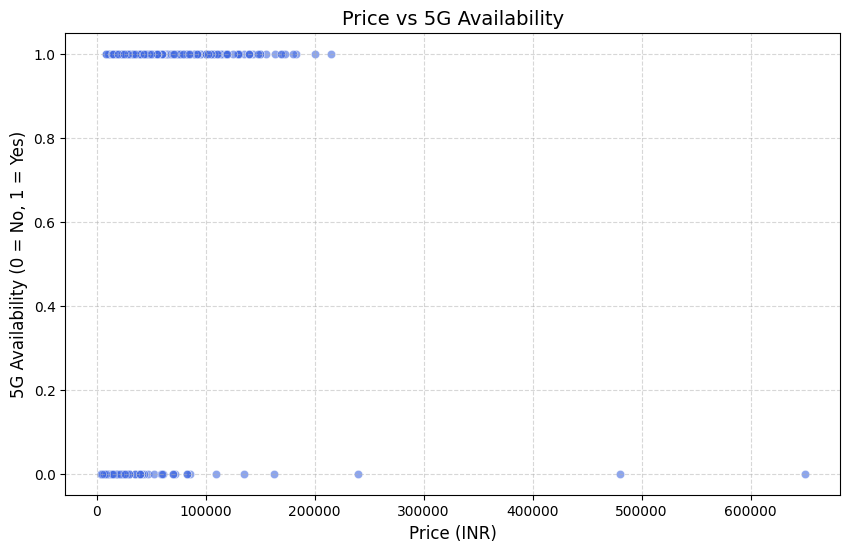

In [70]:
# Scatter plot for Price vs Has_5G
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='price', y='has_5g', alpha=0.6, color='royalblue')

# Customizing the plot
plt.xlabel('Price (INR)', fontsize=12)
plt.ylabel('5G Availability (0 = No, 1 = Yes)', fontsize=12)
plt.title('Price vs 5G Availability', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Apple chips are at the high end (MacBook money, basically 💸).

MediaTek and Unisoc are mostly in the budget segment.

Snapdragon covers all price ranges, proving its versatility.

Exynos and Dimensity processors lean toward mid-range and premium.

<ipython-input-73-cc4b1507f954>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['processor_brand'], y=df1['price'], palette='coolwarm')


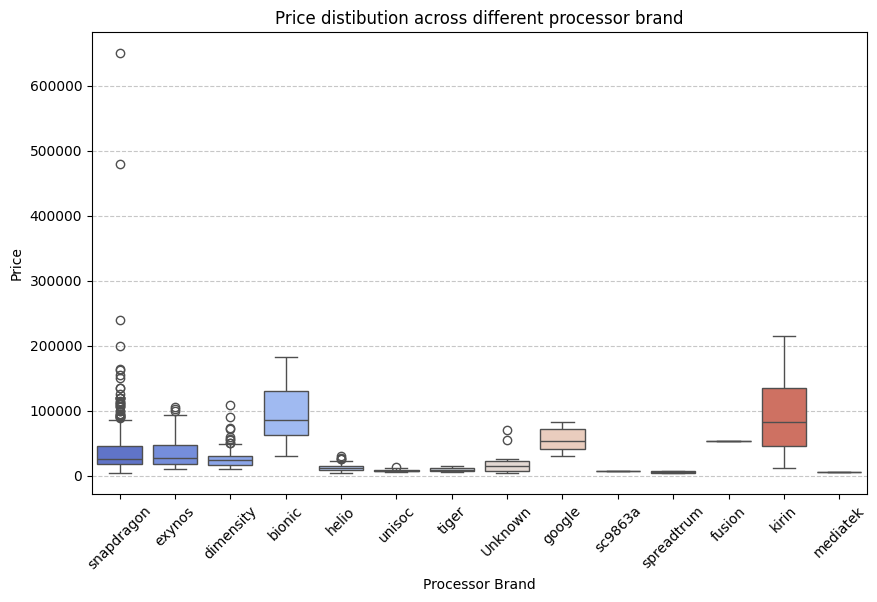

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['processor_brand'], y=df1['price'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Price distibution across different processor brand")
plt.xlabel("Processor Brand")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-75-2867bc21673c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['num_cores'], y=df1['price'], palette='coolwarm')


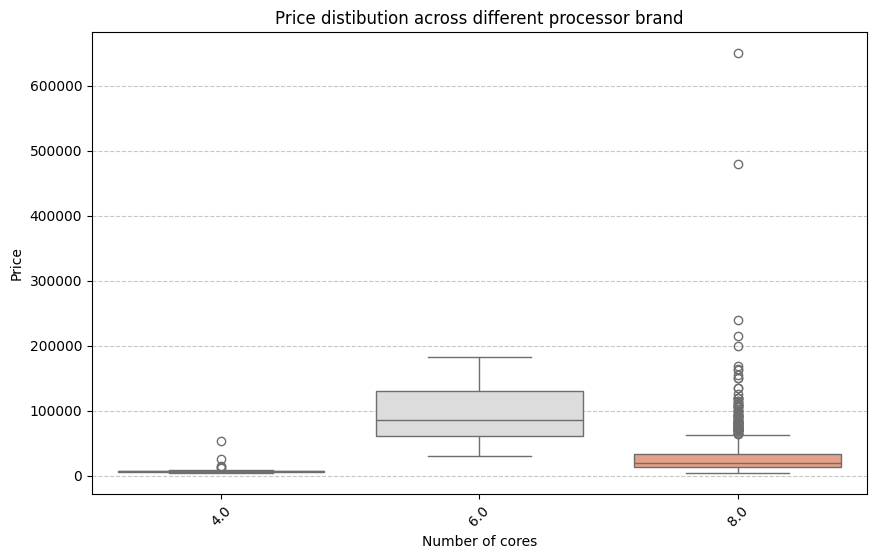

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['num_cores'], y=df1['price'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Price distibution across different processor brand")
plt.xlabel("Number of cores")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Battery capacity alone isn’t a strong price predictor. If you're after a long-lasting battery, look for mid-range devices with large capacities instead of just assuming that expensive = longer battery life! 🔄⚡










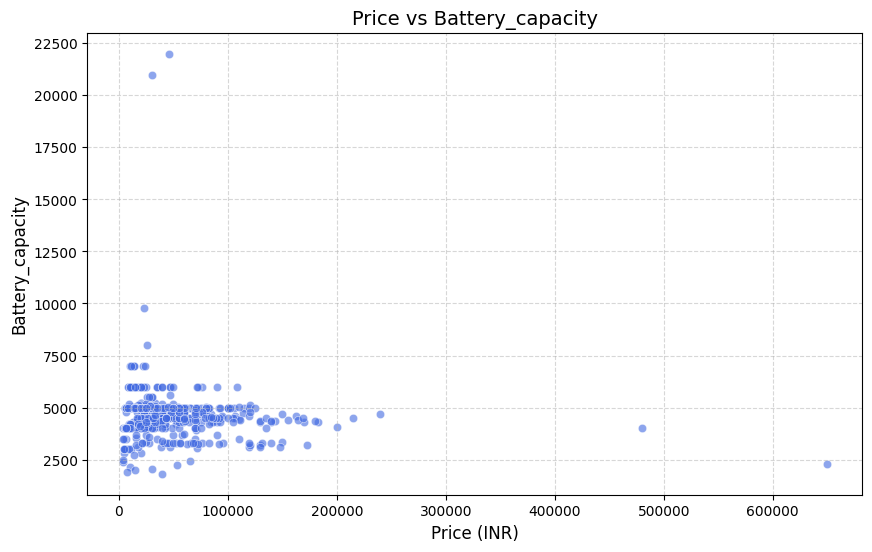

In [77]:
# Scatter plot for Price vs Has_5G
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='price', y='battery_capacity', alpha=0.6, color='royalblue')

# Customizing the plot
plt.xlabel('Price (INR)', fontsize=12)
plt.ylabel('Battery_capacity', fontsize=12)
plt.title('Price vs Battery_capacity', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


While more RAM usually means a higher price, don't be fooled—optimization and brand influence pricing too. Buy according to your needs, not just the numbers! ⚡

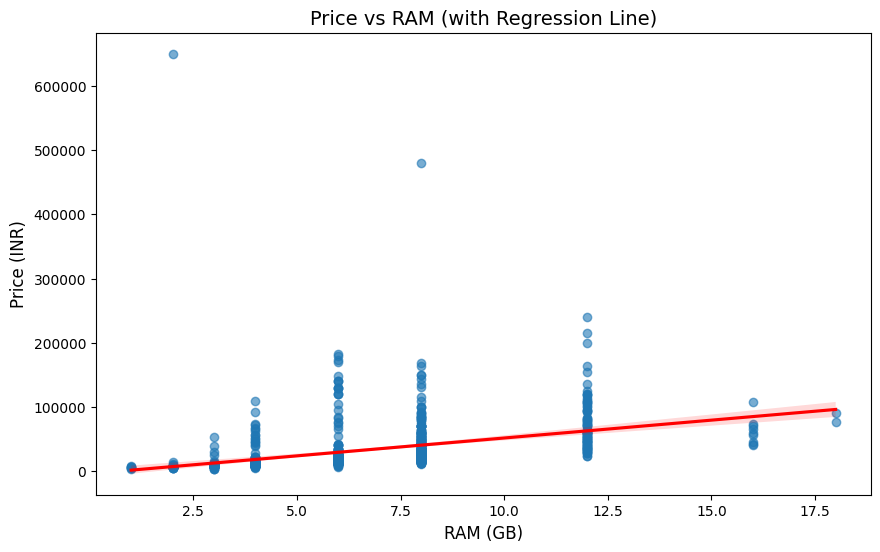

In [80]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line
sns.regplot(x=df1['ram_capacity'], y=df1['price'], scatter_kws={'alpha':0.6}, line_kws={"color": "red"})

# Title and labels
plt.title("Price vs RAM (with Regression Line)", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price (INR)", fontsize=12)

# Show the plot
plt.show()


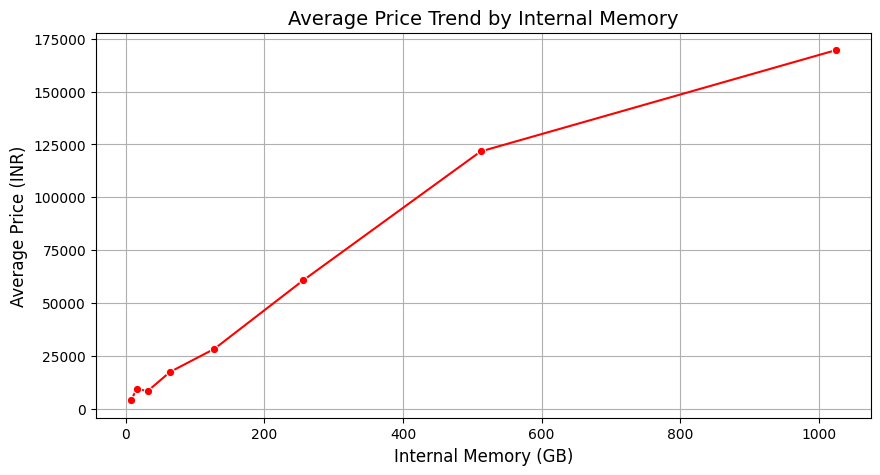

In [82]:
plt.figure(figsize=(10, 5))
memory_price_avg = df1.groupby('internal_memory')['price'].mean()
sns.lineplot(x=memory_price_avg.index, y=memory_price_avg.values, marker="o", color="red")

plt.title("Average Price Trend by Internal Memory", fontsize=14)
plt.xlabel("Internal Memory (GB)", fontsize=12)
plt.ylabel("Average Price (INR)", fontsize=12)
plt.grid(True)

plt.show()


More cameras = higher price (generally).
💡 But sensor quality & brand influence price more than just the number of cameras.

<ipython-input-84-1e32552d852f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['num_rear_cameras'], y=df1['price'], palette="coolwarm")


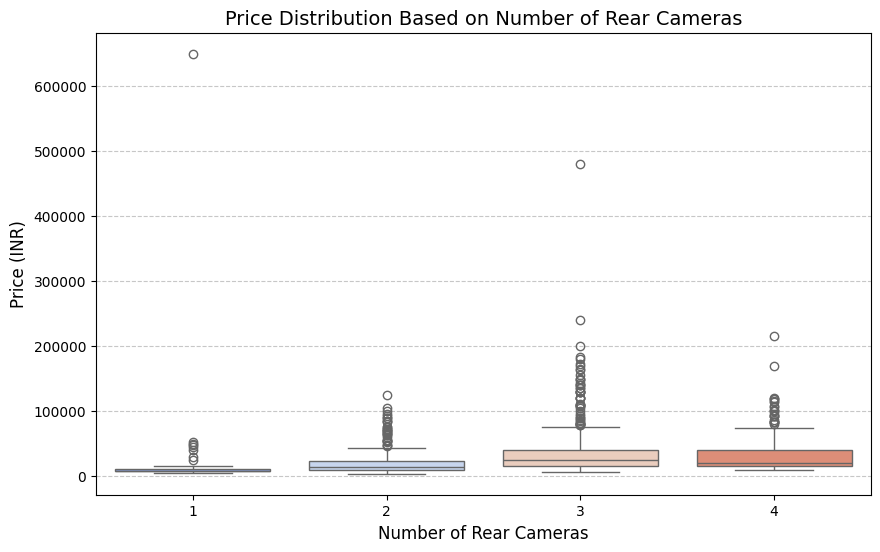

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['num_rear_cameras'], y=df1['price'], palette="coolwarm")

plt.title("Price Distribution Based on Number of Rear Cameras", fontsize=14)
plt.xlabel("Number of Rear Cameras", fontsize=12)
plt.ylabel("Price (INR)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


More megapixels ≠ higher price (it’s not the only factor).

Sensor quality, AI processing, and brand marketing play a bigger role.

Flagship phones may have lower MP but better cameras (e.g., iPhones & Google Pixels).

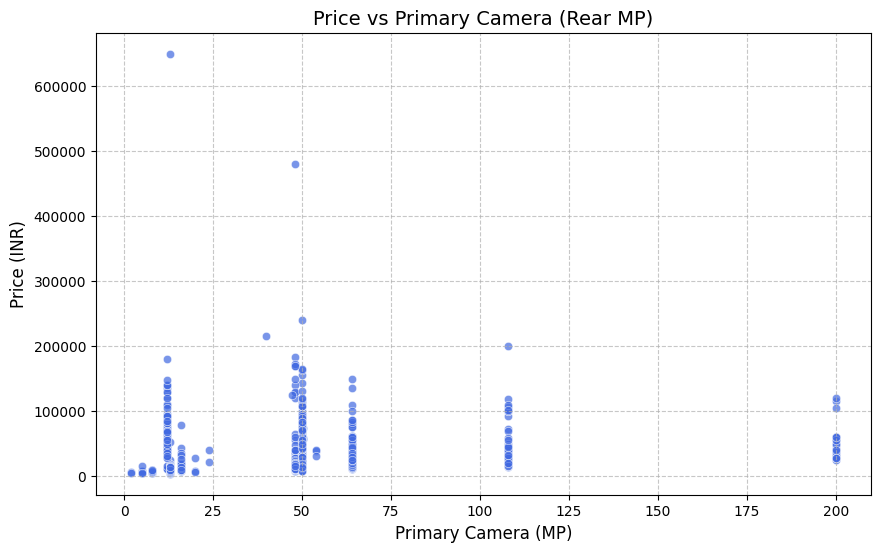

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['primary_camera_rear'], y=df1['price'], alpha=0.7, color='royalblue')

plt.title("Price vs Primary Camera (Rear MP)", fontsize=14)
plt.xlabel("Primary Camera (MP)", fontsize=12)
plt.ylabel("Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


iOS dominates the high-price range 💰🍏 – Apple devices tend to be the most expensive.

2️⃣ Android has a wide price range 📉📈 – From budget to premium, Android covers all segments.

3️⃣ Other OS types (if present) are rare 🤔 – They might have limited models or be outdated.

<ipython-input-88-1fa33aed9e82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="os", y="price", palette="Set2")


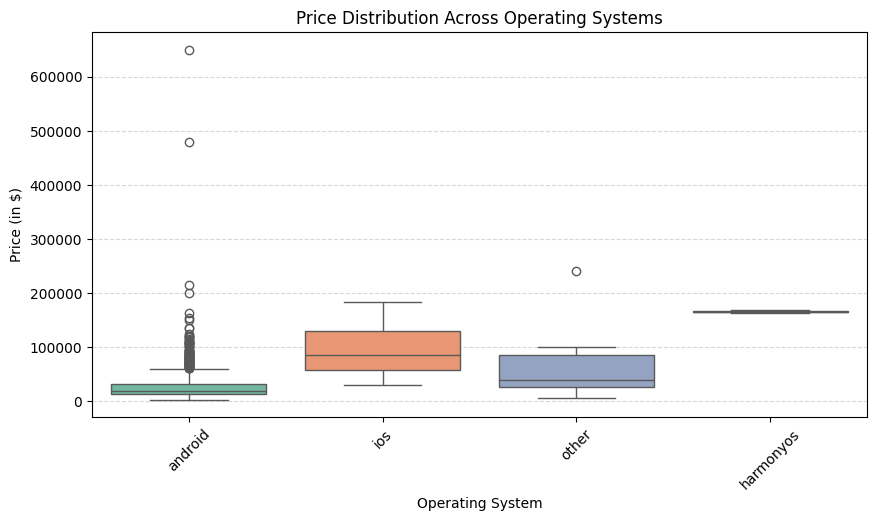

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x="os", y="price", palette="Set2")
plt.title("Price Distribution Across Operating Systems")
plt.xlabel("Operating System")
plt.ylabel("Price (in $)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


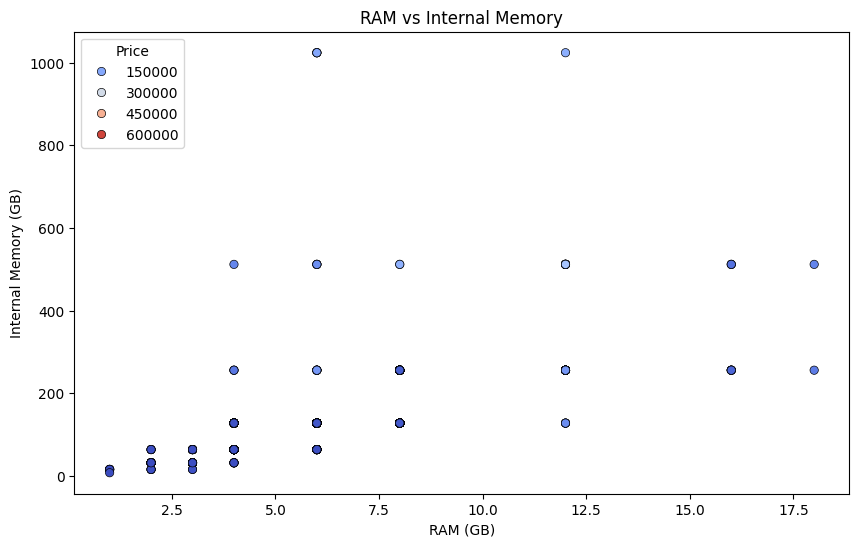

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='ram_capacity', y='internal_memory', hue='price', palette='coolwarm', edgecolor='black')

plt.xlabel("RAM (GB)")
plt.ylabel("Internal Memory (GB)")
plt.title("RAM vs Internal Memory")
plt.legend(title="Price", loc="upper left")
plt.show()


🔋 Phones with higher RAM often come with bigger batteries, but it’s not a strict rule.

📱 Some budget phones prioritize large batteries but may compromise on RAM.

⚡ Flagship devices balance both high RAM and decent battery sizes.

📊 There’s no clear linear correlation, but premium phones tend to offer more of both.

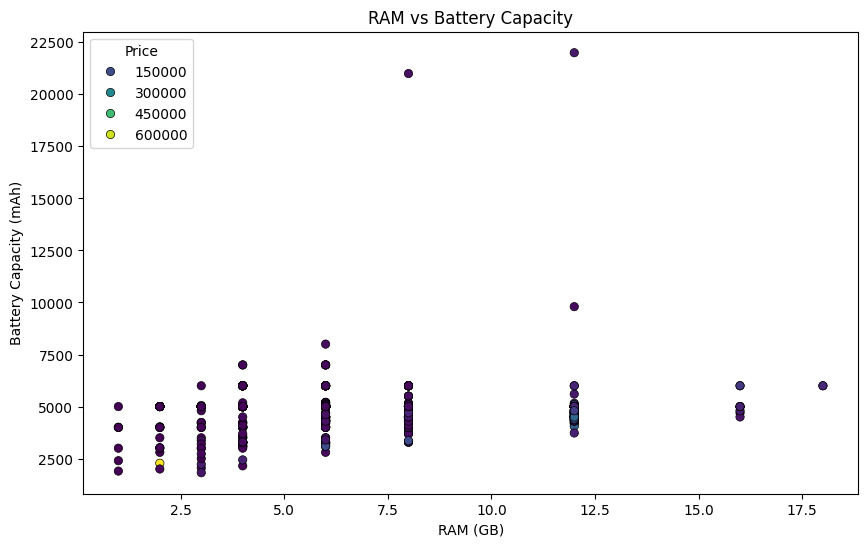

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='ram_capacity', y='battery_capacity', hue='price', palette='viridis', edgecolor='black')

plt.xlabel("RAM (GB)")
plt.ylabel("Battery Capacity (mAh)")
plt.title("RAM vs Battery Capacity")
plt.legend(title="Price", loc="upper left")
plt.show()


📦 Higher storage variants (128GB+) often have better batteries, but the correlation isn’t strict.

🔋 Some mid-range and budget devices pack large batteries despite having less internal memory.

💰 Premium smartphones seem to balance both well—offering higher storage and solid battery life.

📊 No clear trend, but flagships tend to cluster in the high storage & high battery range.

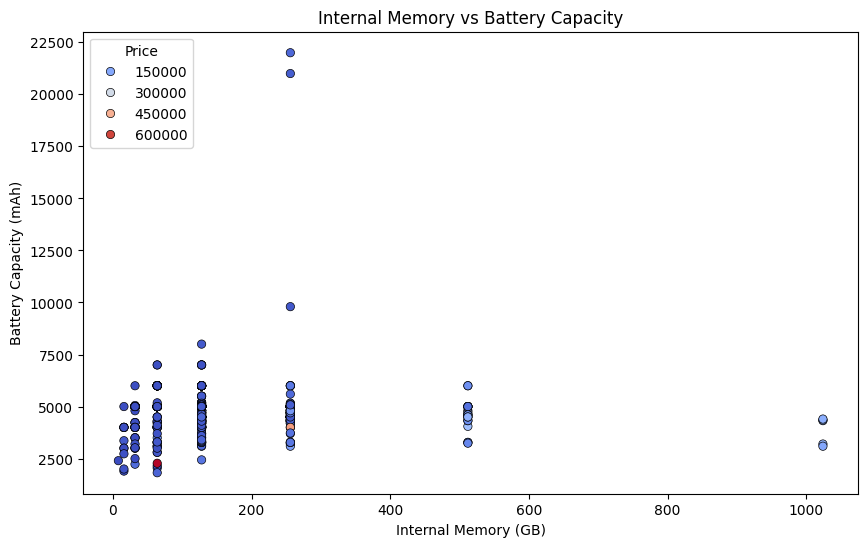

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='internal_memory', y='battery_capacity', hue='price', palette='coolwarm', edgecolor='black')

plt.xlabel("Internal Memory (GB)")
plt.ylabel("Battery Capacity (mAh)")
plt.title("Internal Memory vs Battery Capacity")
plt.legend(title="Price", loc="upper left")
plt.show()


Higher price ≠ Always better performance: While flagship devices justify their price with high-end specs, some mid-range phones offer competitive features at a lower cost.

Processor Brand Matters: Apple and Qualcomm dominate premium segments, while MediaTek and Unisoc power budget-friendly devices.

RAM & Internal Memory Impact Price Significantly: More RAM and storage generally increase the cost, but brands optimize these factors differently.

Battery Capacity is not directly proportional to price: Some budget phones boast massive batteries, while premium devices balance battery life with optimization.

Multivariate Anlysis

In [96]:
import plotly.express as px
import pandas as pd

# Convert categorical 'processor_brand' into numerical labels for 3D plotting
df1['processor_brand_encoded'] = df1['processor_brand'].astype('category').cat.codes

# Create 3D Scatter Plot
fig = px.scatter_3d(df1,
                     x='processor_brand_encoded',
                     y='ram_capacity',
                     z='price',
                     color='processor_brand',  # Color by processor brand
                     hover_data=['model'],  # Show phone model on hover
                     title="3D Scatter Plot: Price vs Processor Brand & RAM")

# Update axis labels
fig.update_layout(scene=dict(
    xaxis_title="Processor Brand (Encoded)",
    yaxis_title="RAM (GB)",
    zaxis_title="Price"
))

# Show Plot
fig.show()
